# Problem statement.
Build a recommender system by using cosine simillarties score.

## 1. Import Necessary Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import difflib

from sklearn.metrics.pairwise import linear_kernel as linker
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer   #Lets vectorize all these titles

## 2. Import Dataset

In [33]:
user_data = pd.read_csv('book.csv',encoding='ISO-8859–1')
user_data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


## 3. EDA
### 3.1 Initial Data Understanding | 3.2 Data Preparation

In [34]:
user_data.shape

(10000, 4)

In [35]:
user_data.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [36]:
user_data.dtypes

Unnamed: 0      int64
User.ID         int64
Book.Title     object
Book.Rating     int64
dtype: object

In [37]:
user_data.describe(include='all')

,Unnamed: 0,User.ID,Book.Title,Book.Rating
count,10000.00000,10000.000000,10000,10000.00000
unique,NaN,NaN,9659,NaN
top,NaN,NaN,Fahrenheit 451,NaN
freq,NaN,NaN,5,NaN
mean,5000.50000,95321.249800,NaN,7.56630
std,2886.89568,117645.703609,NaN,1.82152
min,1.00000,8.000000,NaN,1.00000
25%,2500.75000,2103.000000,NaN,7.00000
50%,5000.50000,3757.000000,NaN,8.00000
75%,7500.25000,162052.000000,NaN,9.00000


In [38]:
print('The unique user ids are\n',user_data['User.ID'].unique())
print('\nThe number of user :',user_data['User.ID'].nunique())
print('\nThe unique book titles are\n',user_data['Book.Title'].unique())
print('\nThe number of books :',user_data['Book.Title'].nunique())
print('\nThe unique ratings are\n',user_data['Book.Rating'].unique())
print('\nThe number of ratings :',user_data['Book.Rating'].nunique())

The unique user ids are
 [276726 276729 276736 ... 162113 162121 162129]

The number of user : 2182

The unique book titles are
 ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'How to Flirt: A Practical Guide' 'Twilight'
 'Kids Say the Darndest Things']

The number of books : 9659

The unique ratings are
 [ 5  3  6  8  7 10  9  4  1  2]

The number of ratings : 10


In [39]:
user_data.rename(columns={'Unnamed: 0':'index','User.ID':'User_ID','Book.Title':'Book_title','Book.Rating':'book_rating'},inplace=True)

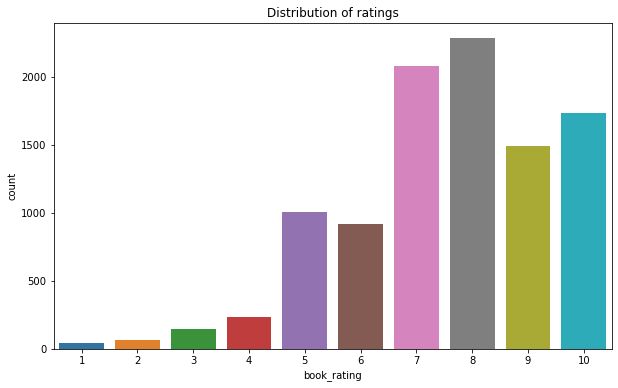

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='book_rating', data=user_data)
plt.title('Distribution of ratings')

plt.show()

###### most of the books got rating 7,8,10.

In [90]:
#Extract books that have received more than 3 ratings.
rating = user_data.groupby('Book_title')['book_rating'].count().reset_index()
rating.rename(columns= {'book_rating':'number_of_ratings'}, inplace=True)
final_user_data = user_data.merge(rating, on='Book_title')

final_user_data = final_user_data[final_user_data['number_of_ratings'] >= 2]
final_user_data.drop_duplicates(['User_ID','Book_title'], inplace=True)

In [91]:
final_user_data

,index,User_ID,Book_title,book_rating,number_of_ratings
5,6,276744,The Kitchen God's Wife,7,2
6,1430,278012,The Kitchen God's Wife,7,2
19,19,276762,The Testament,8,3
20,950,277527,The Testament,7,3
21,4316,1733,The Testament,10,3
...,...,...,...,...,...
9154,9110,161577,The Most Wanted,6,2
9155,9642,161986,The Most Wanted,6,2
9525,9498,161899,The Wise Women of Havana,9,2
9526,9576,161936,The Wise Women of Havana,7,2


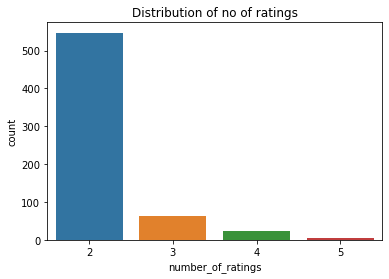

In [93]:
sns.countplot(x='number_of_ratings', data=final_user_data)
plt.title('Distribution of no of ratings')
plt.show()

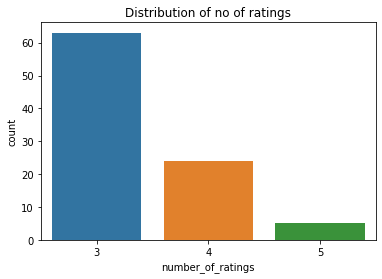

In [101]:
#Extract books that have received more than 3 ratings.
rating = user_data.groupby('Book_title')['book_rating'].count().reset_index()
rating.rename(columns= {'book_rating':'number_of_ratings'}, inplace=True)
final_user_data = user_data.merge(rating, on='Book_title')

final_user_data = final_user_data[final_user_data['number_of_ratings'] >=3]
final_user_data.drop_duplicates(['User_ID','Book_title'], inplace=True)

final_user_data

sns.countplot(x='number_of_ratings', data=final_user_data)
plt.title('Distribution of no of ratings')
plt.show()

###### Most of the books got rating by 2 users.
###### None of the book got rating by more than 5 users.
* Around 5-6 books got rating by 5 users.
* Around 22 books got rating by 4 users.
* Around 62 books got rating by 3 users.

In [9]:
l = []
for i in range(10000):
    l.append(i)
    i = i+1

In [10]:
user_data['sr_no'] = l

In [11]:
user_data.head()

,index,User_ID,Book_title,book_rating,sr_no
0,1,276726,Classical Mythology,5,0
1,2,276729,Clara Callan,3,1
2,3,276729,Decision in Normandy,6,2
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8,3
4,5,276737,The Mummies of Urumchi,6,4


## 4. Recommendation Engine Building

In [12]:
# IMP features = ['Book_title', 'book_rating']
    
def combined_features():
    return user_data['Book_title']+" "+str(user_data['book_rating'])

In [13]:
a = combined_features().to_list()
a

['Classical Mythology 0       5\n1       3\n2       6\n3       8\n4       6\n       ..\n9995    7\n9996    9\n9997    7\n9998    8\n9999    6\nName: book_rating, Length: 10000, dtype: int64',
 'Clara Callan 0       5\n1       3\n2       6\n3       8\n4       6\n       ..\n9995    7\n9996    9\n9997    7\n9998    8\n9999    6\nName: book_rating, Length: 10000, dtype: int64',
 'Decision in Normandy 0       5\n1       3\n2       6\n3       8\n4       6\n       ..\n9995    7\n9996    9\n9997    7\n9998    8\n9999    6\nName: book_rating, Length: 10000, dtype: int64',
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It 0       5\n1       3\n2       6\n3       8\n4       6\n       ..\n9995    7\n9996    9\n9997    7\n9998    8\n9999    6\nName: book_rating, Length: 10000, dtype: int64',
 'The Mummies of Urumchi 0       5\n1       3\n2       6\n3       8\n4       6\n       ..\n9995    7\n9996    9\n9997    7\n9998    8\n9999    6\nName: book_ra

In [14]:
#creating new column of combined_feature in dataframe 
user_data['combined_feature'] = a

In [15]:
user_data

,index,User_ID,Book_title,book_rating,sr_no,combined_feature
0,1,276726,Classical Mythology,5,0,Classical Mythology 0 5\n1 3\n2 ...
1,2,276729,Clara Callan,3,1,Clara Callan 0 5\n1 3\n2 6\n...
2,3,276729,Decision in Normandy,6,2,Decision in Normandy 0 5\n1 3\n2 ...
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8,3,Flu: The Story of the Great Influenza Pandemic...
4,5,276737,The Mummies of Urumchi,6,4,The Mummies of Urumchi 0 5\n1 3\n2...
...,...,...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7,9995,American Fried: Adventures of a Happy Eater. 0...
9996,9997,162121,Cannibal In Manhattan,9,9996,Cannibal In Manhattan 0 5\n1 3\n2 ...
9997,9998,162121,How to Flirt: A Practical Guide,7,9997,How to Flirt: A Practical Guide 0 5\n1 ...
9998,9999,162121,Twilight,8,9998,Twilight 0 5\n1 3\n2 6\n3 ...


In [16]:
# to count the number of texts and we will print the transformed matrix count_matrix into an array for better understanding.
cv = CountVectorizer() #Convert a collection of text documents to a matrix of token counts.
count_matrix = cv.fit_transform(user_data['combined_feature'])
print("Count Matrix:\n", count_matrix.toarray())

Count Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.84615385, 0.81537425, ..., 0.76271277, 0.88070485,
        0.76271277],
       [0.84615385, 1.        , 0.81537425, ..., 0.76271277, 0.88070485,
        0.76271277],
       [0.81537425, 0.81537425, 1.        , ..., 0.73496842, 0.84866842,
        0.73496842],
       ...,
       [0.76271277, 0.76271277, 0.73496842, ..., 1.        , 0.79385662,
        0.6875    ],
       [0.88070485, 0.88070485, 0.84866842, ..., 0.79385662, 1.        ,
        0.79385662],
       [0.76271277, 0.76271277, 0.73496842, ..., 0.6875    , 0.79385662,
        1.        ]])

In [18]:
cosine_sim.compress(cosine_sim[1])

array([1.        , 0.84615385, 0.81537425, ..., 0.76271277, 0.88070485,
       0.76271277])

In [19]:
cosine_sim.compress(cosine_sim[15])

array([1.        , 0.84615385, 0.81537425, ..., 0.76271277, 0.88070485,
       0.76271277])

In [20]:
a = cosine_sim.diagonal()
a

array([1., 1., 1., ..., 1., 1., 1.])

In [28]:
def book_index():
    book_name = input('Enter book name you read and you liked : ')   
    def get_index_from_title(title):
        return user_data[user_data.Book_title == title]["sr_no"]
    book_index = get_index_from_title(book_name)
    print('Index of book is','\n',book_index)

In [30]:
book_index()

Enter book name you read and you liked : New York Dead
Index of book is 
 8830    8830
Name: sr_no, dtype: int64


In [31]:
sim_scores = list(enumerate(cosine_sim[8830]))
sim_scores = sorted(sim_scores,key=lambda x: x[1], reverse=True)

ranked_titles = []
for i in range(1, 11):
    ranked_titles.append([user_data['Book_title']])

def get_title_from_index(index):
    return user_data[user_data.index == index]["Book_title"].values[0]

i=0
sorted_similar_movies=  sim_scores
for movie in sorted_similar_movies:
    print(get_title_from_index(movie[0]))
    i=i+1
    if i>15:
        break

New York Dead
New York Dogs
Dead Aim
NEW SHOE
New Cardiff
Dead Ringer
Dead Sleep
Dead Run
Dead Eyes
Dead Morn
Dead Even
Dead Time
Dead Water
S.W.A.T.
Q
S.
